In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset (NSL-KDD)

In [ ]:
url = "https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain+.txt"
df = pd.read_csv(url, header=None)
print(df.shape)  
# Assign column names (Based on NSL-KDD dataset description)
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
           "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
           "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
           "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
           "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
           "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"]
df.columns = columns

# Drop the 'difficulty' column
df = df.drop(columns=["difficulty"])


(125973, 43)


# Step 2: Data Preprocessing

# Step 2: Data Preprocessing

In [4]:
# Convert categorical features into numerical values
categorical_columns = ["protocol_type", "service", "flag", "label"]
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Feature-target split
X = df.drop(columns=["label"])
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Model Training & Evaluation

In [6]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Train SVM Classifier with class weighting
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Step 4: Model Evaluation


Model: Random Forest
Accuracy: 0.9980154792617583
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      0.33      0.50         9
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         1
           5       0.99      0.99      0.99       733
           6       0.00      0.00      0.00         3
           9       1.00      1.00      1.00      8228
          10       0.98      0.99      0.99       313
          11       1.00      1.00      1.00     13422
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.93      0.96        43
          15       1.00      1.00      1.00       573
          16       0.00      0.00      0.00         1
          17       1.00      0.99      0.99       738
          18       1.00      1.00      1.00       534
      

C:\Users\Tarun\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tarun\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tarun\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

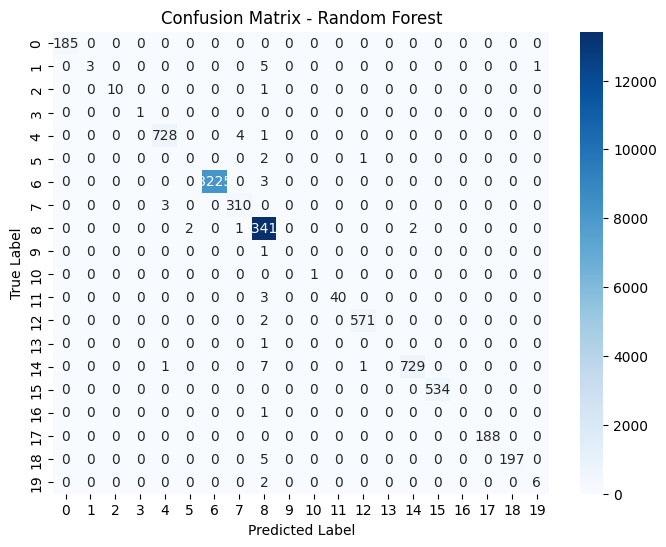


Model: SVM
Accuracy: 0.9668981940861282
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       185
           1       0.40      0.44      0.42         9
           2       0.00      0.00      0.00         0
           3       1.00      0.91      0.95        11
           4       0.14      1.00      0.25         1
           5       0.92      0.99      0.95       733
           6       0.50      0.67      0.57         3
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00      8228
          10       0.84      0.97      0.90       313
          11       1.00      0.94      0.97     13422
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.93      0.96        43
          15       0.93      1.00      0.96       573
          16    

C:\Users\Tarun\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tarun\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tarun\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

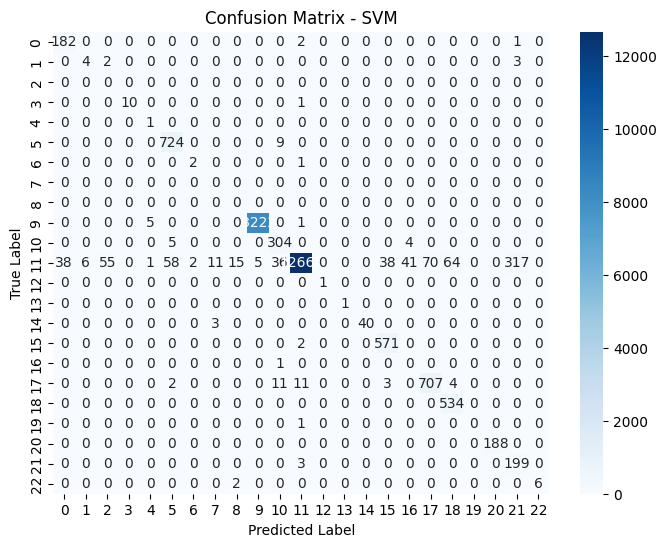

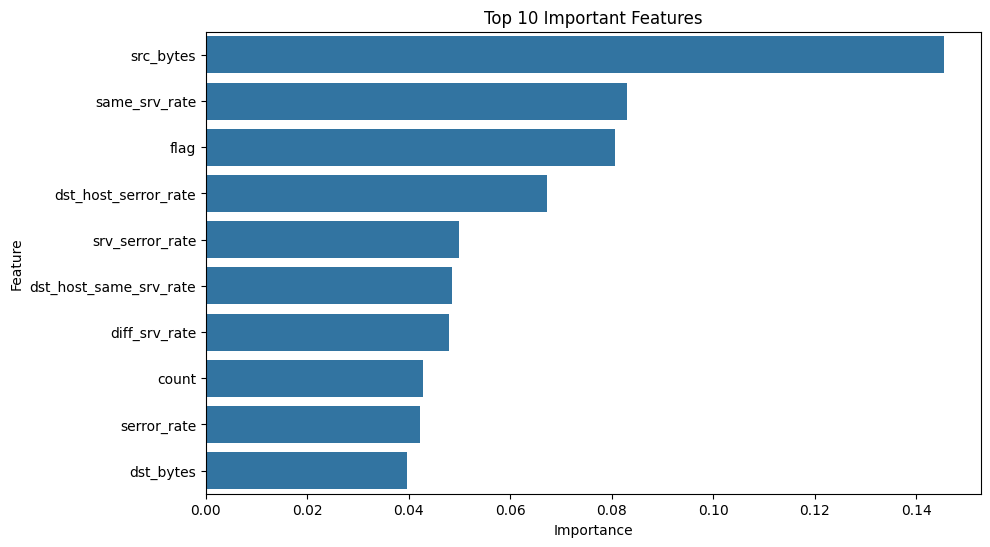

Task Completed Successfully!


In [7]:
def evaluate_model(model_name, y_test, y_pred):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("SVM", y_test, y_pred_svm)

# Feature Importance Visualization
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx][:10], y=np.array(df.columns[:-1])[sorted_idx][:10])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features")
plt.show()

print("Task Completed Successfully!")